<a href="https://colab.research.google.com/github/bitanb1999/HiggsBosonChallenge/blob/main/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HIGGS BOSON DATASET(continued)**

#Pre-requisites:

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   1935      0 --:--:-- --:--:-- --:--:--  1935
     |████████████████████████████████| 22.3MB 67.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 686kB 19.0MB/s 
     |████████████████████████████████| 942kB 43.8MB/s 
     |████████████████████████████████| 112kB 46.6MB/s 
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=8da7930f1c407f3eda0b79fa9d539e6e7ea70fa4c98a6870832fb04610946188
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


In [ ]:
!pip install -U rfpimp
!pip install -U imbalanced-learn
%matplotlib inline
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import pickle
import csv
import collections
from rfpimp import *
from rfpimp import plot_corr_heatmap
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

Requirement already up-to-date: rfpimp in /usr/local/lib/python3.7/dist-packages (1.3.7)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


# Dataset:

In [ ]:
training=pd.read_csv("higgs-boson/training.zip")
test =pd.read_csv("higgs-boson/test.zip")
#set event id as index 
training.set_index('EventId', inplace=True)
test.set_index('EventId', inplace=True)

In [ ]:
training.PRI_jet_num.value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [ ]:
#split 
X = training.drop(['Label', 'Weight'], axis =1)
y = training['Label']
y=pd.factorize(y)[0]
X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992


In [ ]:
y

array([0, 1, 1, ..., 0, 1, 1])

#Stacking
Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.8,stratify=y, random_state=1001)

In [ ]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig, ax = plt.subplots(figsize = (12, 8))
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

In [ ]:
gb_reg = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=100, loss='exponential', verbose=1)
gb_reg.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.9329           39.03s
         2           0.9100           39.53s
         3           0.8948           39.53s
         4           0.8804           39.16s
         5           0.8643           40.11s
         6           0.8520           39.02s
         7           0.8402           38.26s
         8           0.8294           37.57s
         9           0.8229           37.22s
        10           0.8153           36.70s
        20           0.7586           32.27s
        30           0.7248           28.39s
        40           0.7035           24.26s
        50           0.6920           20.05s
        60           0.6833           15.95s
        70           0.6763           11.92s
        80           0.6704            7.98s
        90           0.6654            4.00s
       100           0.6609            0.00s


GradientBoostingClassifier(loss='exponential', max_depth=2, max_features=0.3,
                           verbose=1)

In [ ]:
gb_val_performance = classification_report(yval, gb_reg.predict(Xval))
gb_train_performance = classification_report(ytrain, gb_reg.predict(Xtrain))

In [ ]:
print(gb_val_performance)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     17133
           1       0.85      0.90      0.87     32867

    accuracy                           0.83     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.83      0.82     50000



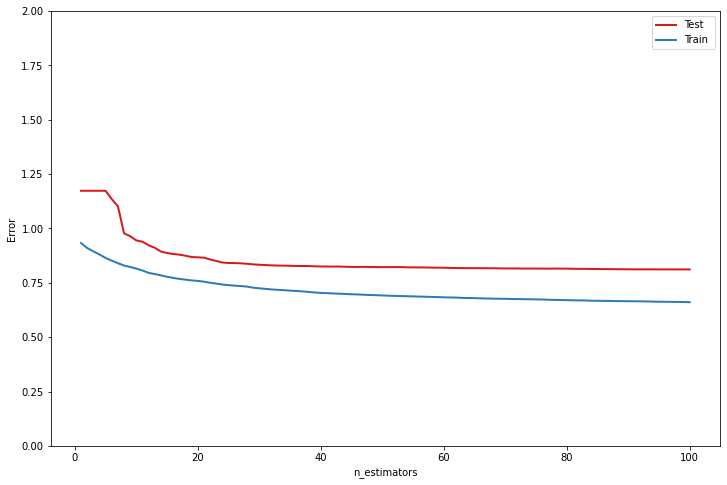

In [ ]:
deviance_plot(gb_reg, Xval, yval, ylim=(0,2.0));
plt.legend();

In [ ]:
name = list(Xtrain.columns)

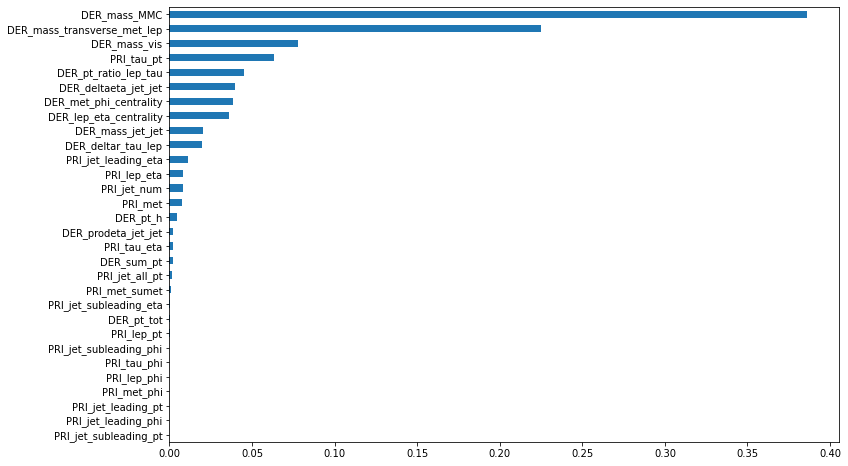

In [ ]:
plt.figure(figsize=(12, 8))
pd.Series(gb_reg.feature_importances_, index=name).sort_values().plot(kind="barh")

In [ ]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dvalid = xgb.DMatrix(Xval, label=yval)

xgb_pars = {'min_child_weight': 100, 'eta': 0.04, 'colsample_bytree': 0.8, 'max_depth': 100,
             'subsample': 0.75, 'lambda': 2, 'nthread': -1, 'booster' : 'gbtree', 'verbosity': 2, 'gamma' : 0,
             'eval_metric': 'mae', 'objective': 'reg:linear'}    

xgb = xgb.train(xgb_pars, dtrain, 20,
                  maximize=False, verbose_eval=15) 

[15:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1644 extra nodes, 0 pruned nodes, max_depth=23
[15:24:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1560 extra nodes, 0 pruned nodes, max_depth=21
[15:24:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1596 extra nodes, 0 pruned nodes, max_depth=22
[15:24:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1588 extra nodes, 0 pruned nodes, max_depth=22
[15:24:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1618 extra nodes, 0 pruned nodes, max_depth=20
[15:24:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1644 extra nodes, 0 pruned nodes, max_depth=24
[15:24:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roo

In [ ]:
y_pred=xgb.predict(dvalid)

In [ ]:
y_pred_=[1 if y>0.5 else 0 for y in y_pred]

In [ ]:
print(classification_report(yval,y_pred_))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     17133
           1       0.86      0.90      0.88     32867

    accuracy                           0.84     50000
   macro avg       0.83      0.81      0.82     50000
weighted avg       0.84      0.84      0.84     50000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME.R',n_estimators=150, learning_rate=0.5)

# Fit on the entire data
boost.fit(Xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=150)

In [ ]:
boost_val_performance = classification_report(yval, boost.predict(Xval))
boost_train_performance = classification_report(ytrain, boost.predict(Xtrain))
print(boost_val_performance)
print(boost_train_performance)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     17133
           1       0.85      0.89      0.87     32867

    accuracy                           0.82     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.82      0.82     50000

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     68534
           1       0.85      0.88      0.86    131466

    accuracy                           0.82    200000
   macro avg       0.80      0.79      0.79    200000
weighted avg       0.82      0.82      0.82    200000



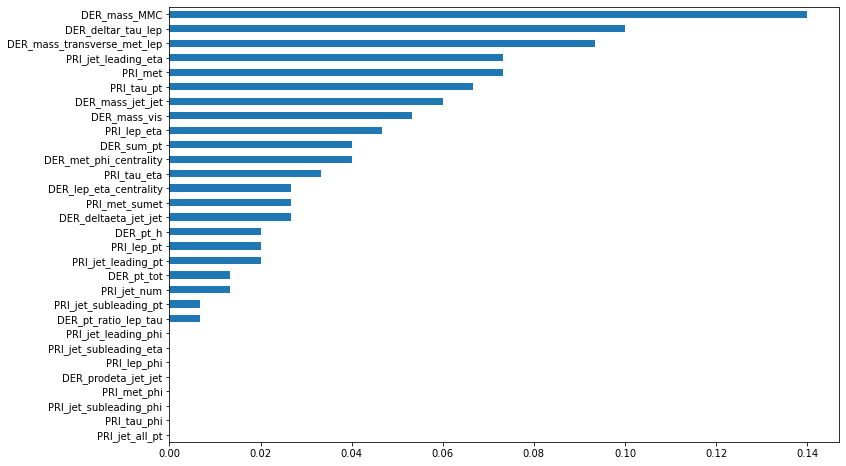

In [ ]:
plt.figure(figsize=(12, 8))
pd.Series(boost.feature_importances_, index=name).sort_values().plot(kind="barh")

In [ ]:

rf = RandomForestClassifier(n_estimators=500, max_features=3, max_depth=4, random_state=1001, n_jobs=-1)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500, n_jobs=-1,
                       random_state=1001)

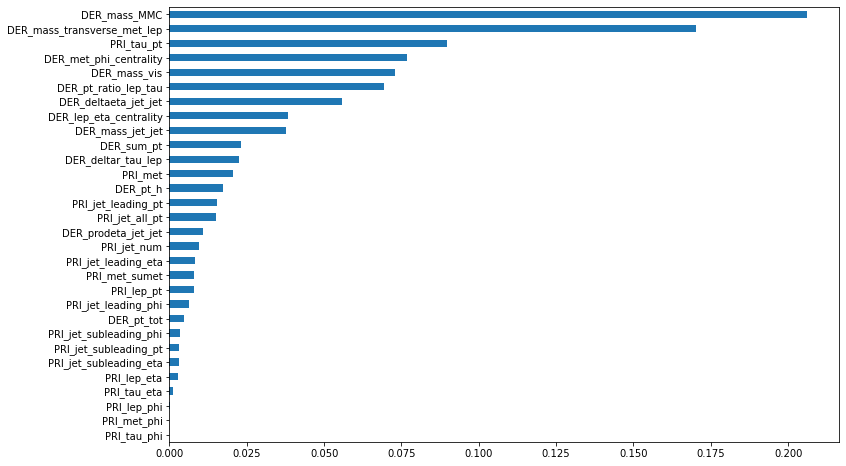

In [ ]:
plt.figure(figsize=(12, 8))
pd.Series(rf.feature_importances_, index=name).sort_values().plot(kind="barh")

In [ ]:
rf_val_performance = classification_report(yval, rf.predict(Xval))
rf_train_performance = classification_report(ytrain, rf.predict(Xtrain))
print(rf_val_performance)
print(rf_train_performance)

              precision    recall  f1-score   support

           0       0.82      0.50      0.62     17133
           1       0.78      0.94      0.86     32867

    accuracy                           0.79     50000
   macro avg       0.80      0.72      0.74     50000
weighted avg       0.80      0.79      0.78     50000

              precision    recall  f1-score   support

           0       0.82      0.50      0.62     68534
           1       0.78      0.94      0.86    131466

    accuracy                           0.79    200000
   macro avg       0.80      0.72      0.74    200000
weighted avg       0.80      0.79      0.78    200000



In [ ]:
rf_features = pd.Series(rf.feature_importances_, index=name).sort_values(ascending=False)
boost_features = pd.Series(boost.feature_importances_, index=name).sort_values(ascending=False)
gb_reg_features = pd.Series(gb_reg.feature_importances_, index=name).sort_values(ascending=False)

In [ ]:
f1 = list(rf_features.index[:10])
f2 = list(boost_features.index[:10])
f3 = list(gb_reg_features.index[:10])

In [ ]:

important_features = list(set(f1+f2+f3))
important_features

['DER_mass_MMC',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_sum_pt',
 'DER_deltar_tau_lep',
 'PRI_lep_eta',
 'PRI_met',
 'PRI_jet_leading_eta',
 'DER_pt_ratio_lep_tau',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'PRI_tau_pt']

In [ ]:
X = X[important_features]
X

,DER_mass_MMC,DER_met_phi_centrality,DER_lep_eta_centrality,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_sum_pt,DER_deltar_tau_lep,PRI_lep_eta,PRI_met,PRI_jet_leading_eta,DER_pt_ratio_lep_tau,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
EventId,,,,,,,,,,,,,,
100000,138.470,1.396,0.2,0.91,124.711,197.760,3.064,2.273,16.824,2.150,1.582,51.655,97.827,32.638
100001,160.937,1.414,-999.0,-999.00,-999.000,125.157,3.473,0.501,44.704,0.725,0.879,68.768,103.235,42.014
100002,-999.000,1.414,-999.0,-999.00,-999.000,197.814,3.148,-0.953,54.283,2.053,3.776,162.172,125.953,32.154
100003,143.905,-1.285,-999.0,-999.00,-999.000,75.968,3.310,-0.522,31.082,-999.000,2.354,81.417,80.943,22.647
100004,175.864,-1.385,-999.0,-999.00,-999.000,57.983,3.891,0.798,2.723,-999.000,1.056,16.915,134.805,28.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,-999.000,-1.414,-999.0,-999.00,-999.000,55.892,1.392,-0.950,46.520,-999.000,1.258,71.989,36.548,24.754
349996,-999.000,-1.345,-999.0,-999.00,-999.000,50.618,2.585,0.308,46.737,-999.000,1.162,58.179,68.083,23.416
349997,105.457,0.529,-999.0,-999.00,-999.000,120.462,2.390,0.381,23.419,1.800,1.202,60.526,75.839,35.636


In [ ]:
rf=1001

In [ ]:
# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	models['gb'] = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=rf)
# 	models['rf'] = RandomForestClassifier(n_estimators=500, max_features=3, max_depth=4, random_state=rf)
# 	models['ab'] = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), algorithm = 'SAMME.R',n_estimators=150, learning_rate=0.5, random_state=rf)
# 	return models

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('gb', GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=rf)))
	level0.append(('rf', RandomForestClassifier(n_estimators=50, max_features=3, max_depth=4, random_state=rf, n_jobs=-1)))
	level0.append(('ab', AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1),algorithm = 'SAMME.R',n_estimators=100, learning_rate=0.5)))
	# define meta learner model
	level1 = LogisticRegression(max_iter=10000, penalty='l2', C=1000)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
def get_models():
	models = dict()
	models['gb'] = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=rf)
	models['rf'] = RandomForestClassifier(n_estimators=50, max_features=3, max_depth=4, random_state=rf, n_jobs=-1)
	models['ab'] = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), algorithm = 'SAMME.R',n_estimators=100, learning_rate=0.5, random_state=rf)
	models['stacking'] = get_stacking()
	return models

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>gb 0.816 (0.001)
>rf 0.811 (0.001)
>ab 0.815 (0.001)
